(-2.0, 6.0)

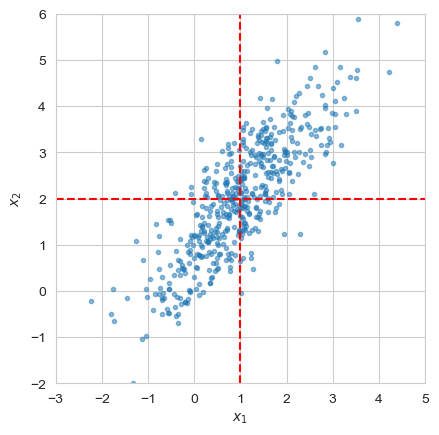

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mean = [1, 2]
# center of data
cov = [[1, 1], [1, 1.5]]
# covariance matrix

# 生成多元正态分布数据
X = np.random.multivariate_normal(mean, cov, 500)

fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='.')

plt.axvline(x=mean[0], color='r', linestyle='--')
plt.axhline(y=mean[1], color='r', linestyle='--')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('scaled')

ax.set_xlim([-3, 5])
ax.set_ylim([-2, 6])


Text(43.847222222222214, 0.5, '$x_2$')

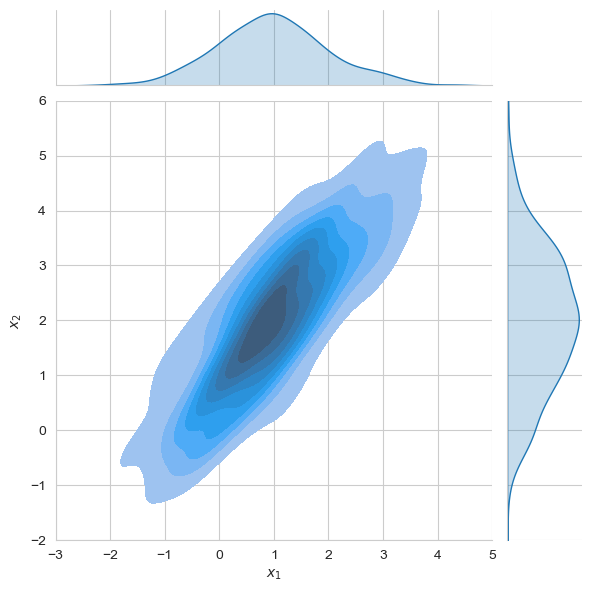

In [2]:
X_df = pd.DataFrame(X, columns=['x_1', 'x_2'])

sns.jointplot(data=X_df, x='x_1', y='x_2',
              kind='kde', fill=True,
              xlim=(-3, 5), ylim=(-2, 6))

ax.set_aspect('equal')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


(-2.0, 6.0)

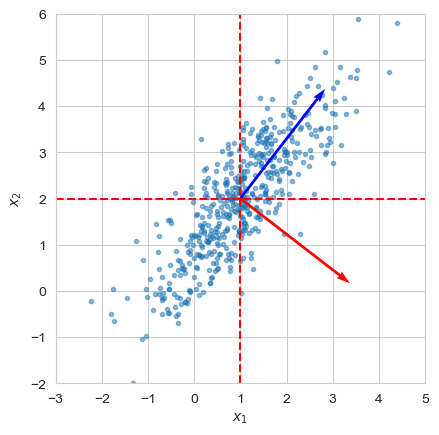

In [3]:
from sklearn.decomposition import PCA  # 主成分分析

# 创建 PCA 模型，设定降维到2个主成分
pca = PCA(n_components=2)
pca.fit(X)

fig, ax = plt.subplots()

plt.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='.')

plt.axvline(x=mean[0], color='r', linestyle='--')
plt.axhline(y=mean[1], color='r', linestyle='--')

# plot first principal component, PC1
# 绘制第一主成分，PC1
PC1_x = pca.components_[0, 0]
PC1_y = pca.components_[0, 1]

ax.quiver(mean[0], mean[1], PC1_x, PC1_y,
          angles='xy', scale_units='xy', scale=1 / 3,
          edgecolor='none', facecolor='b')

# plot second principal component, PC2

# 绘制第二主成分，PC2
PC2_x = pca.components_[1, 0]
PC2_y = pca.components_[1, 1]

ax.quiver(mean[0], mean[1], PC2_x, PC2_y,
          angles='xy', scale_units='xy', scale=1 / 3,
          edgecolor='none', facecolor='r')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('scaled')

ax.set_xlim([-3, 5])
ax.set_ylim([-2, 6])


Text(43.847222222222214, 0.5, '$z_2$')

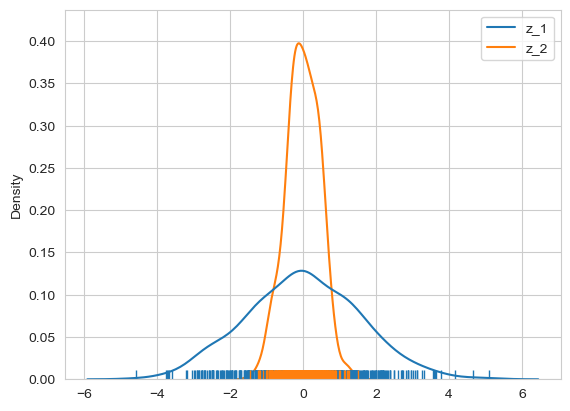

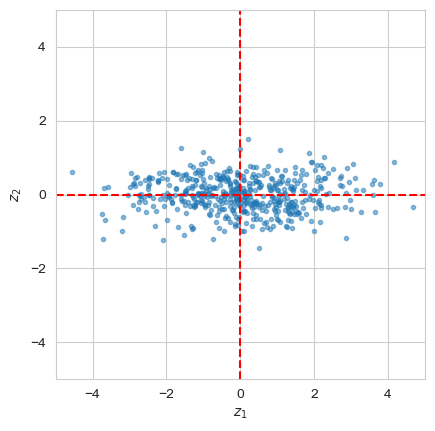

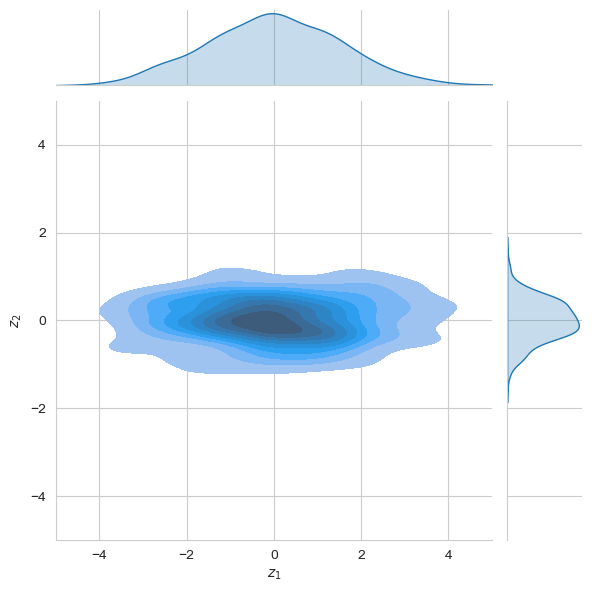

In [5]:
# convert X to Z

# 进行主成分分析变换  将数据投影到主成分空间
Z = pca.transform(X)

Z_df = pd.DataFrame(Z, columns=['z_1', 'z_2'])

fig, ax = plt.subplots()

# 绘制核密度估计
sns.kdeplot(data=Z_df)
# 绘制轴上的刻度标记
sns.rugplot(data=Z_df)

fig, ax = plt.subplots()
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.5, marker='.')

plt.axvline(x=0, color='r', linestyle='--')
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.axis('scaled')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

sns.jointplot(data=Z_df, x='z_1', y='z_2',
              kind='kde', fill=True,
              xlim=(-5, 5), ylim=(-5, 5))

ax.set_aspect('equal')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')


(-2.0, 6.0)

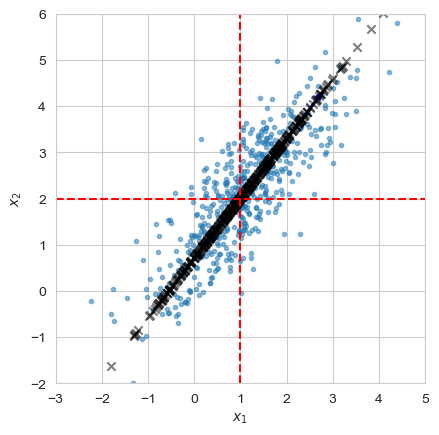

In [9]:
# 创建 PCA 模型，设定降维到1个主成分
pca_PC1 = PCA(n_components=1)
pca_PC1.fit(X)

# 进行主成分分析变换  将数据投影到主成分空间
z1 = pca_PC1.transform(X)
# inverse_transform(z1) 进行逆投影，得到在原始空间中的重构 x1_proj
x1_proj = pca_PC1.inverse_transform(z1)

fig, ax = plt.subplots()

plt.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='.')

# plot first principal component, PC1

PC1_x = pca_PC1.components_[0, 0]
PC1_y = pca_PC1.components_[0, 1]

ax.quiver(mean[0], mean[1], PC1_x, PC1_y,
          angles='xy', scale_units='xy', scale=1 / 3,
          edgecolor='none', facecolor='b')

plt.scatter(x1_proj[:, 0], x1_proj[:, 1], alpha=0.5, c='k', marker='x')

plt.axvline(x=mean[0], color='r', linestyle='--')
plt.axhline(y=mean[1], color='r', linestyle='--')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('scaled')

ax.set_xlim([-3, 5])
ax.set_ylim([-2, 6])